In [67]:
def date_trans(x):
    x1 = int(x.replace("-",""))
    return x1

In [96]:
df1 = pd.read_csv('SH_index_test.csv').iloc[300:,:]
df1=df1.sort_index(0)
df1.rename(columns={'stock_date':'date'},inplace=True)
df1.head()
df1.date = df1.date.apply(date_trans)
print(df1.head())
stock = stockstats.StockDataFrame.retype(df1)
print(stock.head())

         date      open      high       low     close  volume  adj_close
300  20010226  1940.770  1954.779  1935.547  1954.693     0.0   1954.693
301  20010227  1956.272  1962.284  1946.980  1962.042     0.0   1962.042
302  20010228  1964.356  1965.021  1950.931  1959.180     0.0   1959.180
303  20010301  1959.009  1968.357  1953.721  1965.121     0.0   1965.121
304  20010302  1969.056  1987.389  1968.961  1985.111     0.0   1985.111
              open      high       low     close  volume  adj_close
date                                                               
20010226  1940.770  1954.779  1935.547  1954.693     0.0   1954.693
20010227  1956.272  1962.284  1946.980  1962.042     0.0   1962.042
20010228  1964.356  1965.021  1950.931  1959.180     0.0   1959.180
20010301  1959.009  1968.357  1953.721  1965.121     0.0   1965.121
20010302  1969.056  1987.389  1968.961  1985.111     0.0   1985.111


In [97]:
#https://blog.csdn.net/freewebsys/article/details/78578548

import stockstats
import pandas as pd
import matplotlib.pyplot as plt

stock = stockstats.StockDataFrame.retype(df1)
stock['date_time'] = pd.to_datetime(stock.index,format='%Y%m%d')
stock.index = pd.to_datetime(stock.index,format='%Y%m%d')
# stock.set_index(['date'],inplace=True)
stock.head(10)

,open,high,low,close,volume,adj_close,date_time
date,,,,,,,
2001-02-26,1940.770,1954.779,1935.547,1954.693,0.0,1954.693,2001-02-26
2001-02-27,1956.272,1962.284,1946.980,1962.042,0.0,1962.042,2001-02-27
2001-02-28,1964.356,1965.021,1950.931,1959.180,0.0,1959.180,2001-02-28
2001-03-01,1959.009,1968.357,1953.721,1965.121,0.0,1965.121,2001-03-01
2001-03-02,1969.056,1987.389,1968.961,1985.111,0.0,1985.111,2001-03-02
2001-03-05,1991.280,1993.805,1979.654,1984.200,0.0,1984.200,2001-03-05
2001-03-06,1986.732,1990.060,1977.111,1990.060,0.0,1990.060,2001-03-06
2001-03-07,1991.276,1996.853,1986.044,1991.177,0.0,1991.177,2001-03-07
2001-03-08,1990.637,2002.252,1989.869,2000.900,0.0,2000.900,2001-03-08


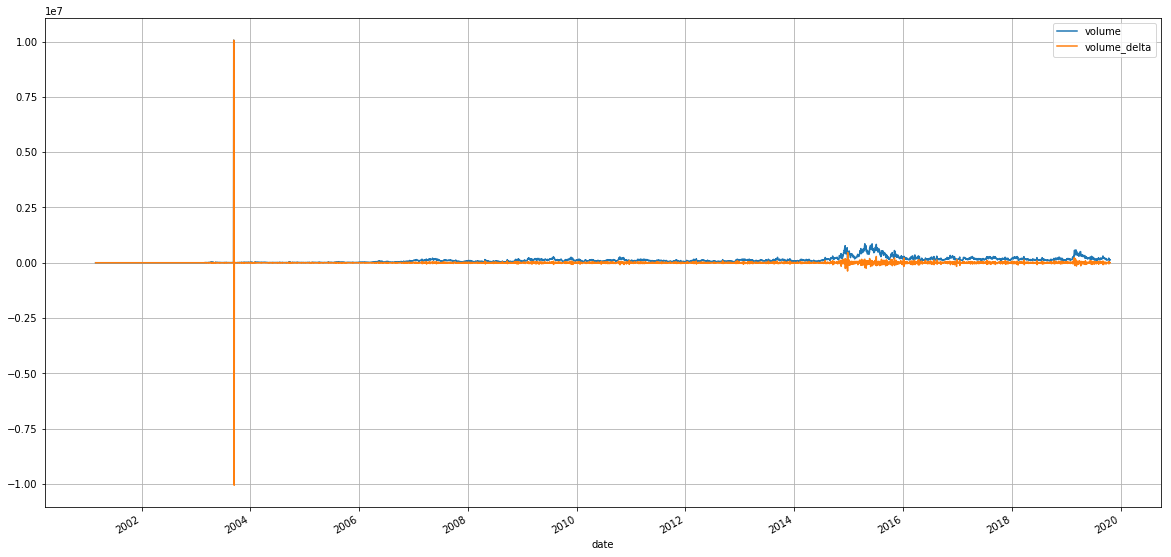

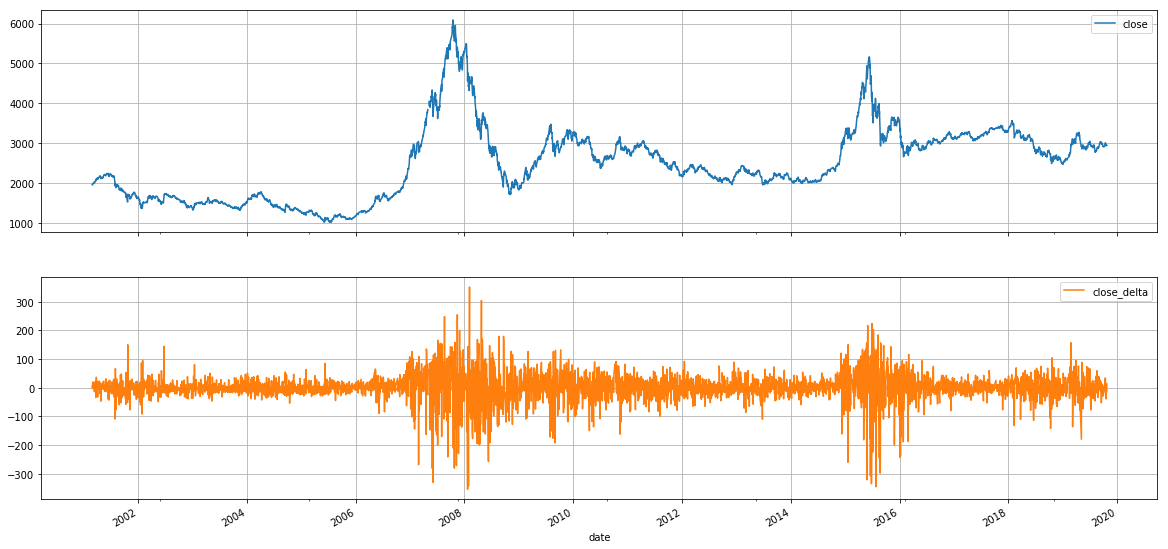

In [98]:
#plt.plot(stock.date_time,stock.close)
#plt.plot(stock.date_time,stock['close_delta'])
stock[['volume','volume_delta']].plot(figsize=(20,10), grid=True)
plt.show()
stock[['close','close_delta']].plot(subplots=True, figsize=(20,10), grid=True)
plt.show()


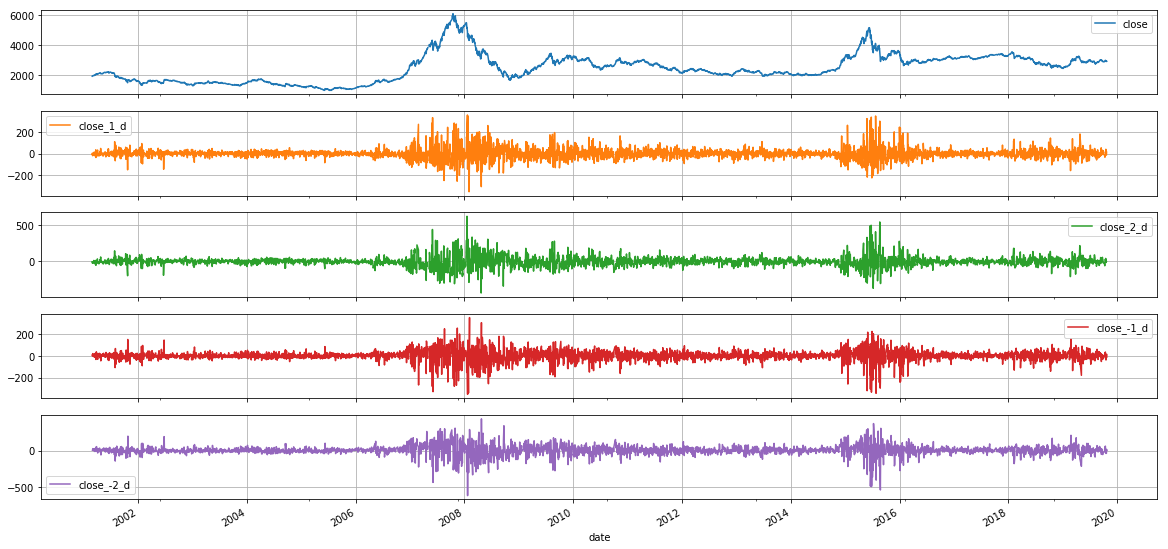

In [99]:
stock[
    ['close','close_1_d','close_2_d','close_-1_d','close_-2_d']
         ].plot(subplots=True, figsize=(20,10), grid=True)
plt.show()
# close_1_d  1 天的价差。 n天 - (n+1)天
# close_2_d  1 天的价差。 n天 - (n+2)天
# shift 函数是将数据 向前-n 向后+n 移动n天。 但是这个操作做了一个负值。
# 也就是 close_-1_d 才是和昨天的差 close_1_d 是和明天的差


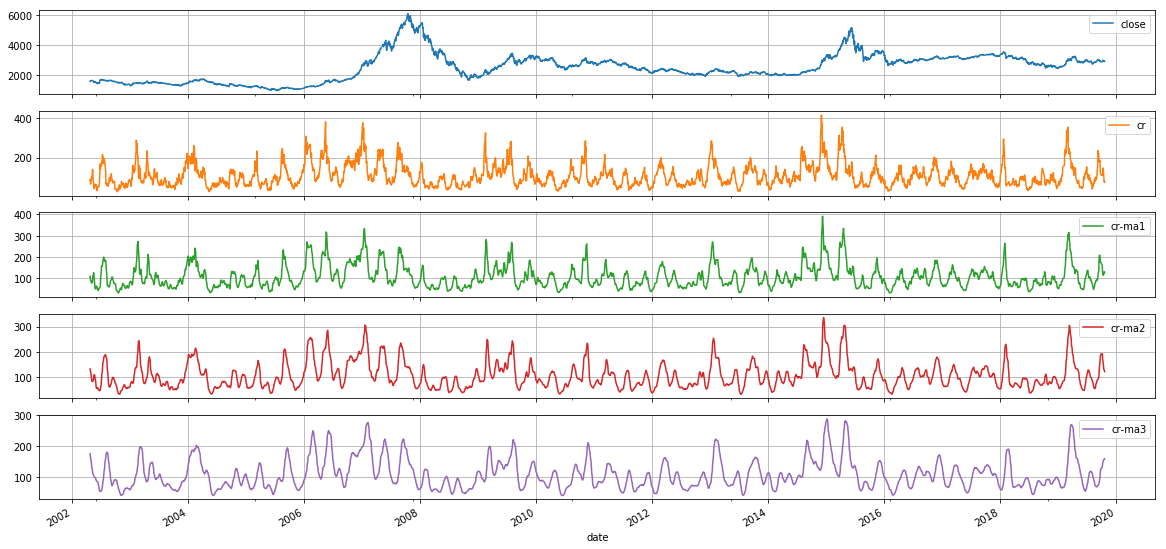

In [100]:
stock[
    ['close','cr','cr-ma1','cr-ma2','cr-ma3']
         ][300:].plot(subplots=True, figsize=(20,10), grid=True)
plt.show()
# CR跌穿a、b、c、d四条线，再由低点向上爬升160时，为短线获利的一个良机，应适当卖出股票。
# CR跌至40以下时，是建仓良机。而CR高于300~400时，应注意适当减仓

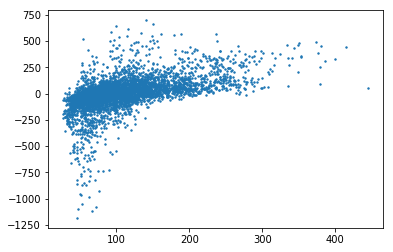

In [106]:
stock['cr']
plt.scatter(stock['cr'],stock['close_-10_d'],s=2)


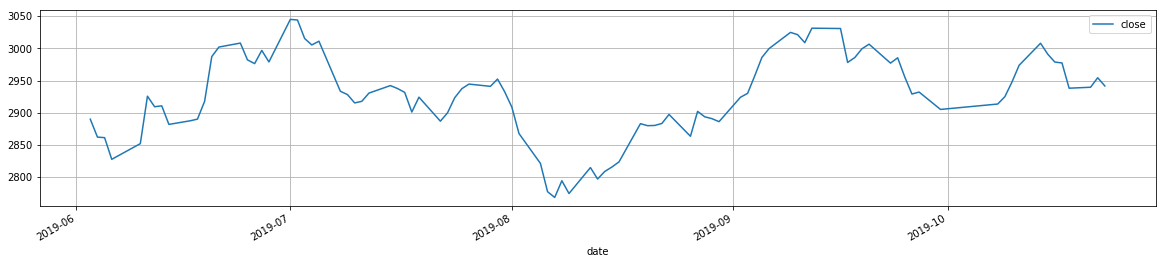

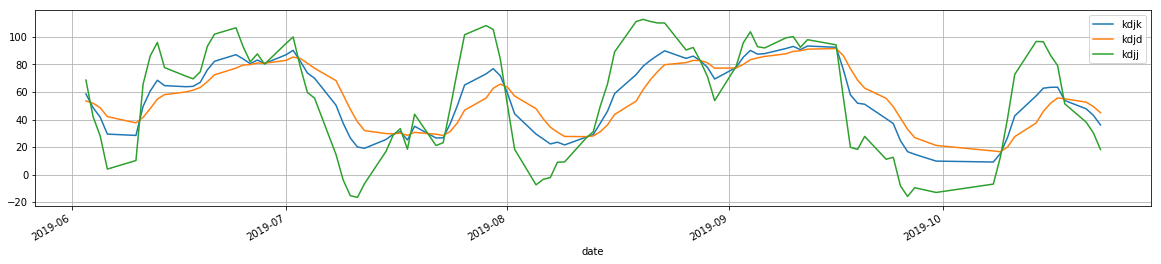

In [130]:
# 随机指标(KDJ)一般是根据统计学的原理，通过一个特定的周期（常为9日、9周等）内出现过的最高价、
# 最低价及最后一个计算周期的收盘价及这三者之间的比例关系，来计算最后一个计算周期的未成熟随机值RSV，
# 然后根据平滑移动平均线的方法来计算K值、D值与J值，并绘成曲线图来研判股票走势。

# （3）在使用中，常有J线的指标，即3乘以K值减2乘以D值（3K－2D＝J），其目的是求出K值与D值的最大乖离程度，
# 以领先KD值找出底部和头部。J大于100时为超买，小于10时为超卖

# stock.tail(100)[['close','kdjk','kdjd','kdjj'] # 分别是k d j 三个数据统计项。
#          ].plot(subplots=True,figsize=(20,10), grid=True)
# plt.show()
date_select = (stock.date_time>'2015-01-01')&(stock.date_time<'2015-12-31')
date_select = (stock.date_time>'2019-06-01')

# print(date_select)
stock[date_select][['close']].plot(subplots=True,figsize=(20,4), grid=True)# 分别是k d j 三个数据统计项。
plt.show()
stock[date_select][['kdjk','kdjd','kdjj'] # 分别是k d j 三个数据统计项。
         ].plot(figsize=(20,4), grid=True)
plt.show()